In [1]:
# Chargement et étude rapide du jeu de données Pima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données
Pima_DF = pd.read_csv('pima_data.csv')
Pima_DF.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,-1
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,-1
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,-1


In [3]:
# Renommer les colonnes et regarder les données manquantes (il n'y en a pas)
Pima_DF.columns = ['#G', 'Gly', 'PSD', 'MG','Ins','IMC','Risk', 'Age', 'Label']
Pima_DF.isnull().sum()

#G       0
Gly      0
PSD      0
MG       0
Ins      0
IMC      0
Risk     0
Age      0
Label    0
dtype: int64

-1    500
 1    267
Name: Label, dtype: int64


<Axes: xlabel='count', ylabel='Label'>

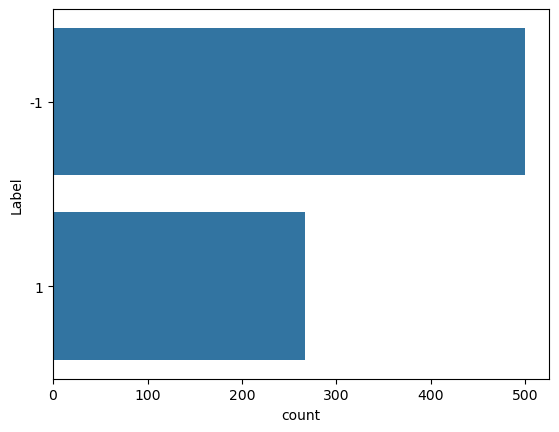

In [4]:
# Répartition graphique des réponses
print(Pima_DF.Label.value_counts())
sns.countplot(y="Label", data=Pima_DF)

<Axes: xlabel='Label', ylabel='Age'>

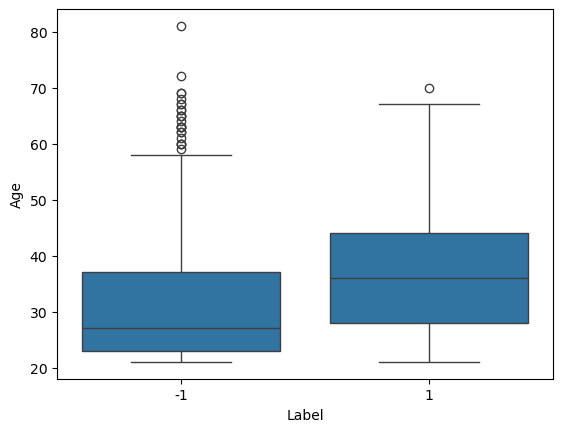

In [5]:
# Répartition graphique des exemples sur une variable spécifique
sns.boxplot(x='Label',y='Age',data=Pima_DF)

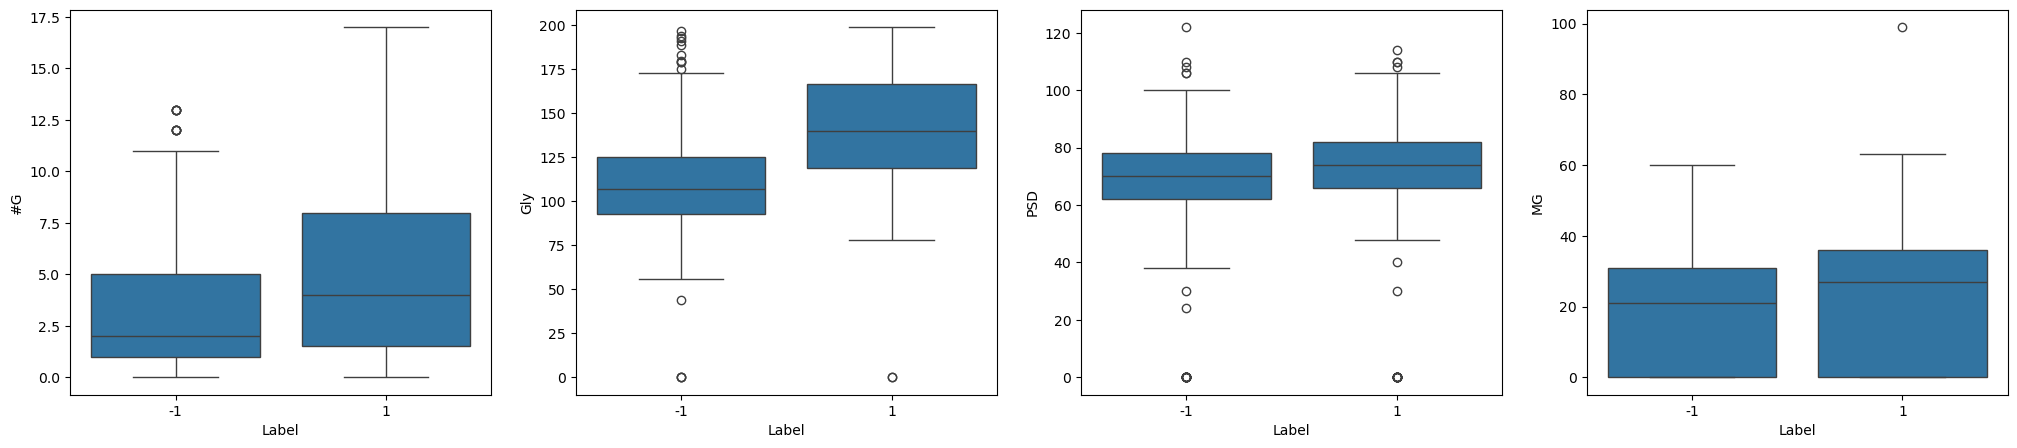

In [6]:
# Répartition graphique des exemples sur un tableau récapitulatif des 4 premières variables
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='Label',y='#G',data=Pima_DF)
plt.subplot(1,4,2)
sns.boxplot(x='Label',y='Gly',data=Pima_DF)
plt.subplot(1,4,3)
sns.boxplot(x='Label',y='PSD',data=Pima_DF)
plt.subplot(1,4,4)
sns.boxplot(x='Label',y='MG',data=Pima_DF);

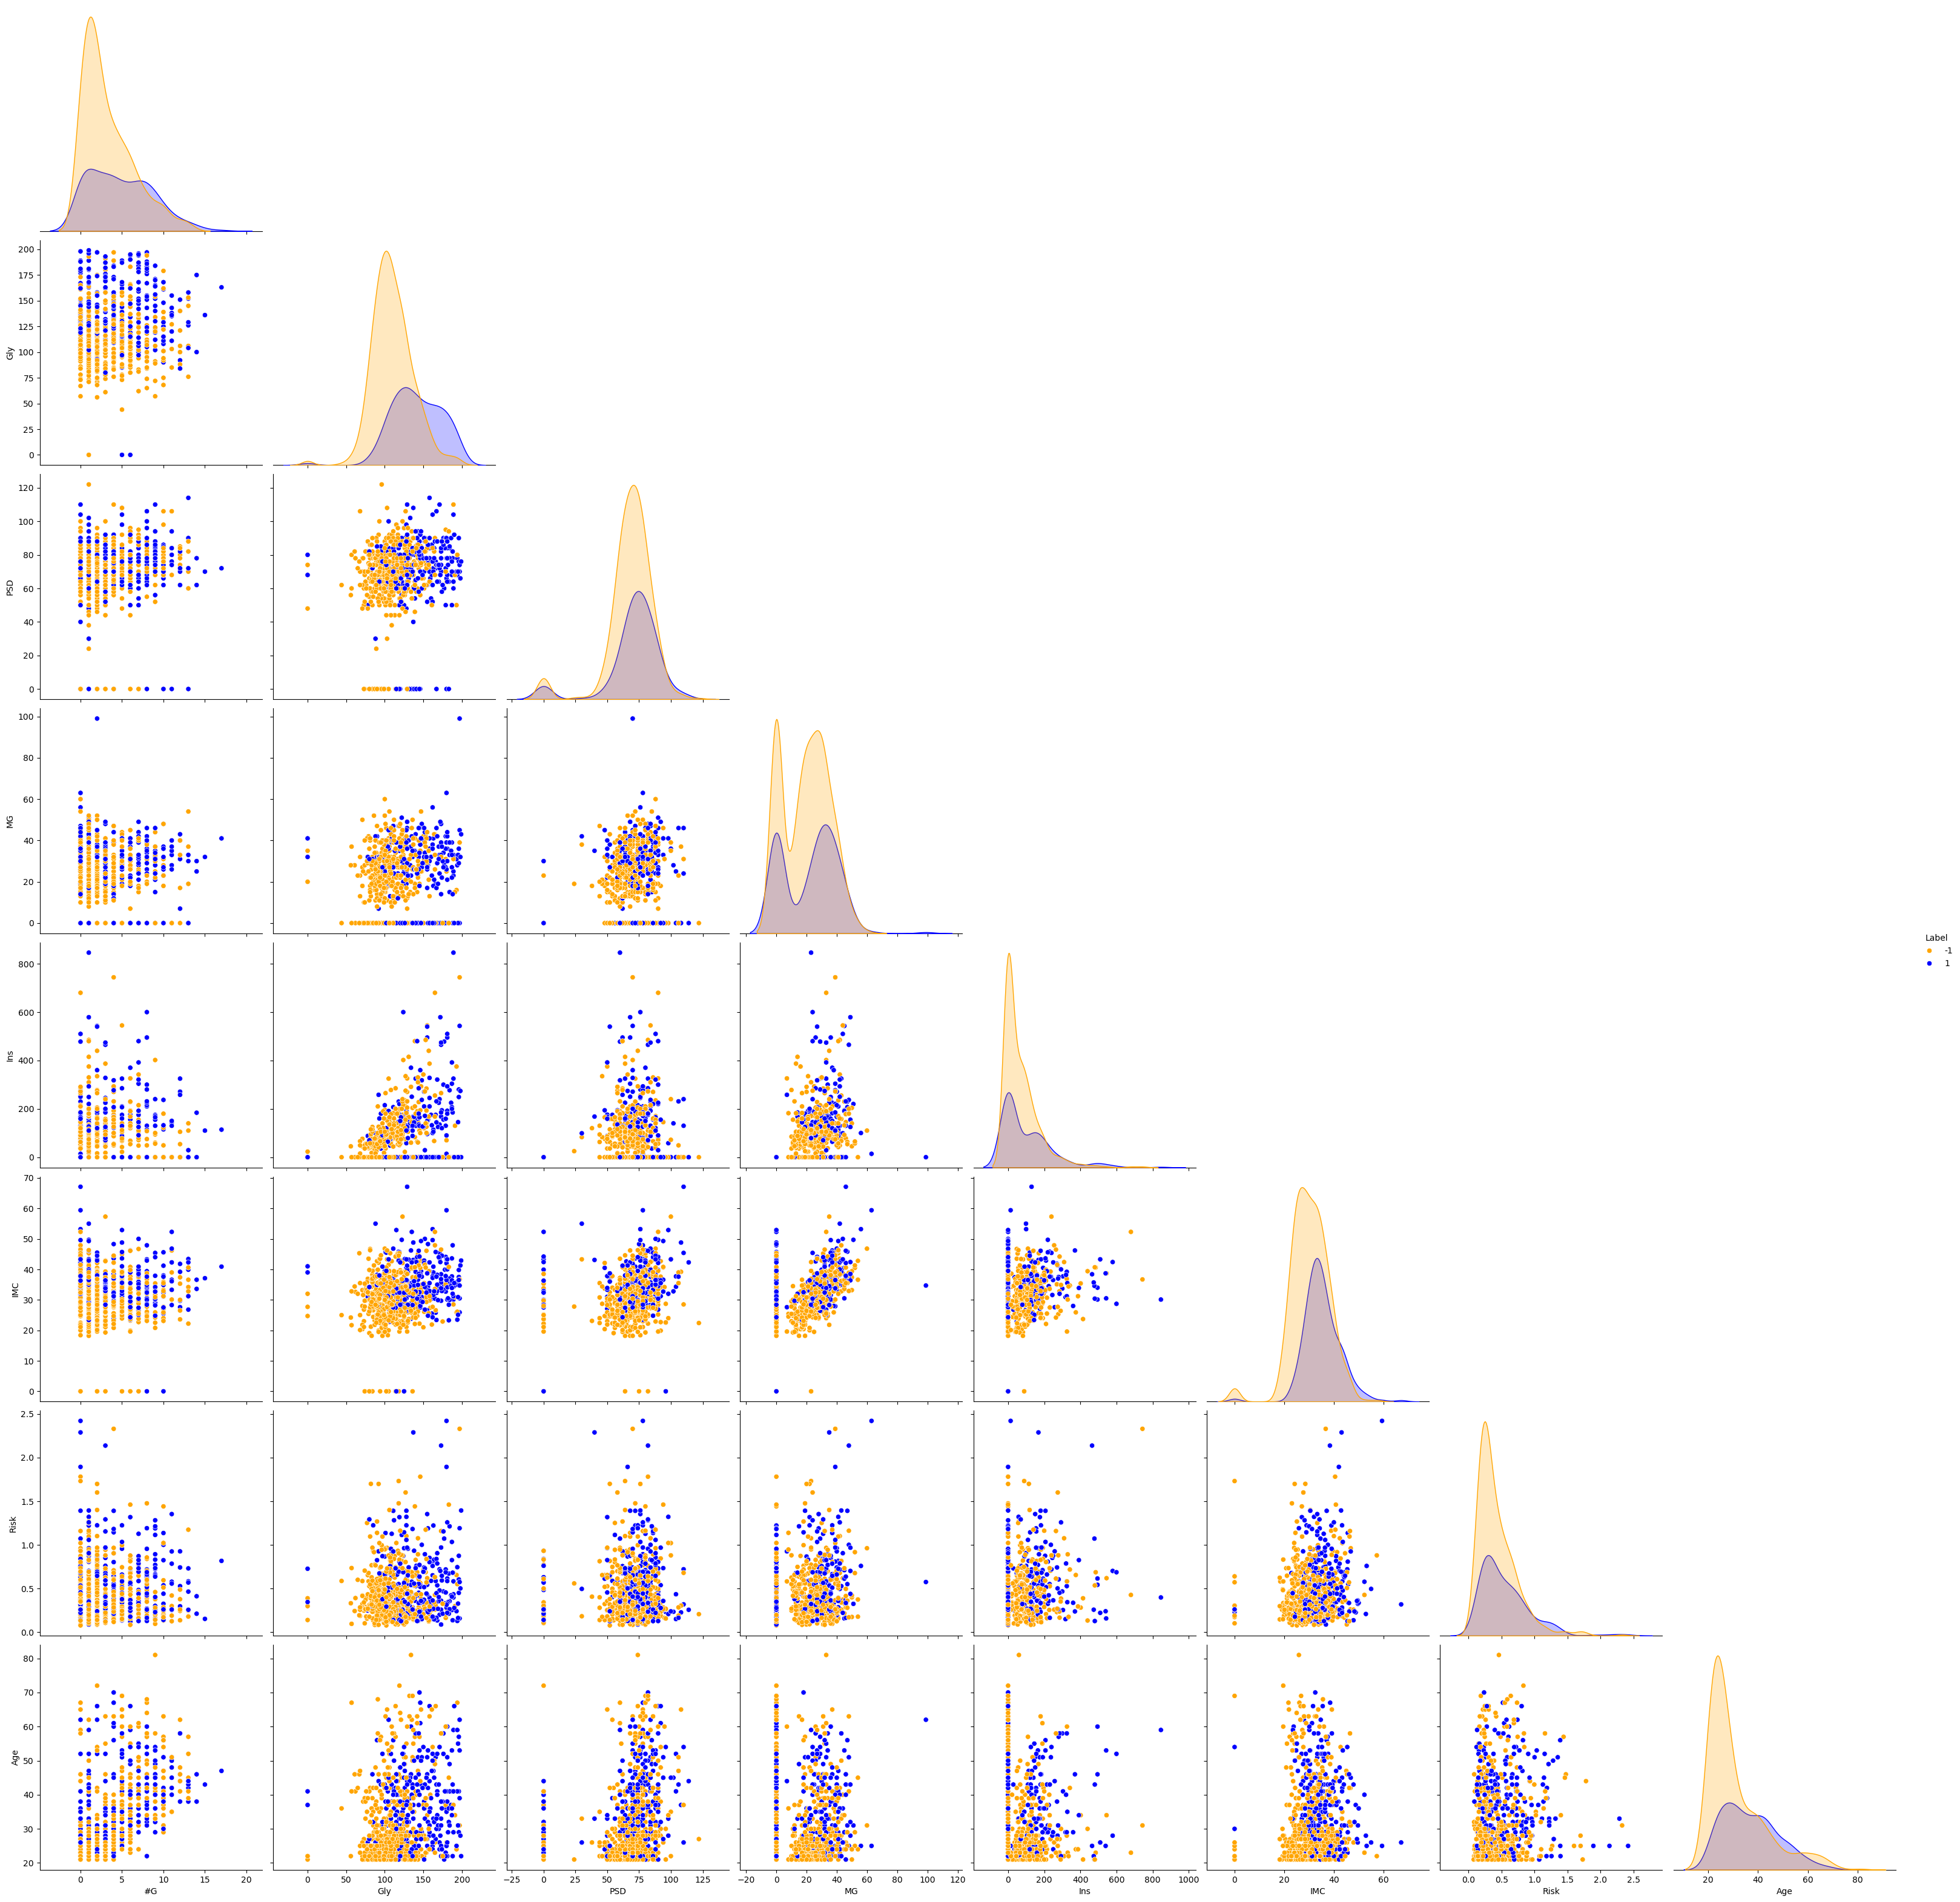

In [7]:
# Répartition graphique des exemples en fonction de toutes les combinaisons de variables 2 à 2
sns.pairplot(Pima_DF, hue='Label', corner = True, palette = ['orange', 'blue'], height=4)

<Axes: >

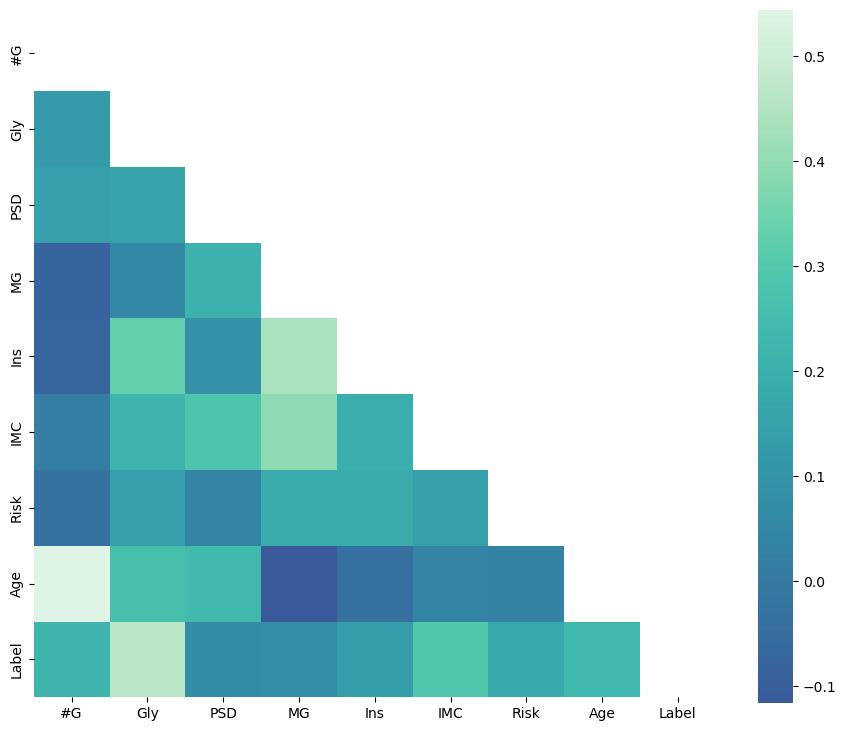

In [8]:
# Matrice de corrélations
Pima_corr = Pima_DF.corr()

# masque triangulaire
mask = np.triu(np.ones_like(Pima_corr, dtype=bool))

# matplolib setup
f, ax = plt.subplots(figsize=(11, 9))

# matrice de corrélationa vec masque trinagulaire inférieur
sns.heatmap(Pima_corr, mask=mask, cmap = 'mako', center=0, square=True)

In [9]:
# Normalisation des donnees

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def normalize(data):
    scaler.fit(data)
    return scaler.transform(data)

scaler_norm = normalize(Pima_DF)

print(scaler_norm.mean(axis=0))
print(scaler_norm.std(axis=0))


[-4.63196047e-18  7.87433280e-17 -2.66337727e-16 -2.43177925e-17
 -7.64273477e-17  5.72047118e-16 -2.31598023e-17  1.59802636e-16
  3.70556837e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
#Séparez le jeu de données global (X, Y) en deux jeux (X_1, Y_1) et (X_2, Y_2) avec un ratio de 1/2. L’ensemble de
#référence sera (X_1, Y_1). Comment tenir compte de l’équilibre des classes dans cette répartition 
from sklearn.model_selection import train_test_split

X = Pima_DF.drop(columns = ['Label'])
Y = Pima_DF.drop(columns = ['#G', 'Gly', 'PSD', 'MG', 'Ins', 'IMC', 'Risk', 'Age'])

X1, X2, Y1, Y2 = train_test_split(X, Y, test_size=0.5)

In [11]:
#Normalisez les deux jeux de données selon les principes du paragraphe précéden
X_train, X_test = map(normalize,(X1,X2))
print(X_train,X_test)

[[-1.1423702   0.29069161  1.97618475 ...  4.22755226 -0.40226414
  -0.57344904]
 [-0.22895102 -0.12858809 -3.27693302 ... -1.00744979 -0.81888366
  -0.83143375]
 [ 0.07552204  0.70997131  0.83004997 ...  1.45396172  0.62665985
  -0.91742865]
 ...
 [ 1.29341427  1.80654898  1.02107243 ...  0.21725252  0.06485473
   2.17838785]
 [-1.1423702  -0.09633581 -3.27693302 ...  0.22925941  1.5324917
   0.97445921]
 [ 0.68446816 -0.16084037 -0.41159605 ...  0.21725252 -0.63582357
   0.6304796 ]] [[-0.85034161 -1.17873002 -0.08985586 ... -1.87383925  0.37049029
  -0.57194332]
 [ 0.59961922  1.31695656 -0.08985586 ...  0.20369193  0.39088383
   1.28714755]
 [-1.14033378  0.4647709   0.81816126 ... -0.64620719 -0.77446149
   2.13218885]
 ...
 [-1.14033378 -0.50915557 -0.08985586 ... -1.63101093 -0.75989468
  -0.99446397]
 [-0.56034944 -0.69176678 -0.99787298 ... -1.01044967  0.40836401
  -1.0789681 ]
 [-0.85034161 -0.99611881 -2.58690294 ... -0.57875488  0.18112167
  -1.0789681 ]]


In [12]:
Y

,Label
0,-1
1,1
2,-1
3,1
4,-1
...,...
762,-1
763,-1
764,-1
765,1


In [13]:
#Appliquez l’algorithme des k plus proches voisins en fixant k à 5 puis à 15
#a) De façon à prédire Y_1 à partir de (X_1, Y_1):

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

def neighbors(X,Y,n):
    n = KNeighborsClassifier(n_neighbors=n)
    n.fit(X,np.ravel(Y))
    Y_pred = n.predict(X)
    return accuracy_score(Y,Y_pred), 1-accuracy_score(Y,Y_pred), recall_score(Y,Y_pred), roc_auc_score(Y,Y_pred)

print(neighbors(X_train,Y1,5))
print(neighbors(X_test,Y2,5))

print(neighbors(X_train,Y1,15))
print(neighbors(X_test,Y2,15))

(0.7989556135770235, 0.2010443864229765, 0.6230769230769231, 0.7562024931590149)
(0.796875, 0.203125, 0.6788321167883211, 0.7705901474629865)
(0.783289817232376, 0.216710182767624, 0.4846153846153846, 0.7106871389480086)
(0.7604166666666666, 0.23958333333333337, 0.5547445255474452, 0.7146192263364757)


In [14]:
## Exo2
# Stratégie 1 : ensemble d’apprentissage, de validation et de test. On recherchera le nombre de voisins optimal dans
#l’ensemble de paramètres p_k = {1, 5, 10, 15, 20, 25}

In [15]:
# On sépare le test (données pas traitées par le modèle/jamais vu du reste avant)
#Séparez le jeu de données global (X, Y) en deux jeux (X_a, Y_a) et (X_v, Y_v) avec un ratio de 2/3.

Xav, Xt, Yav, Yt = train_test_split(X, Y, test_size = 1/2)
Xa, Xv, Ya, Yv = train_test_split(Xav, Yav, test_size=1/3)

In [16]:
#Normalisez les deux jeux de données selon les principes du paragraphe précéden
X_train_a, X_test_v = map(normalize,(Xa,Xv))
print(X_train,X_test)

[[-1.1423702   0.29069161  1.97618475 ...  4.22755226 -0.40226414
  -0.57344904]
 [-0.22895102 -0.12858809 -3.27693302 ... -1.00744979 -0.81888366
  -0.83143375]
 [ 0.07552204  0.70997131  0.83004997 ...  1.45396172  0.62665985
  -0.91742865]
 ...
 [ 1.29341427  1.80654898  1.02107243 ...  0.21725252  0.06485473
   2.17838785]
 [-1.1423702  -0.09633581 -3.27693302 ...  0.22925941  1.5324917
   0.97445921]
 [ 0.68446816 -0.16084037 -0.41159605 ...  0.21725252 -0.63582357
   0.6304796 ]] [[-0.85034161 -1.17873002 -0.08985586 ... -1.87383925  0.37049029
  -0.57194332]
 [ 0.59961922  1.31695656 -0.08985586 ...  0.20369193  0.39088383
   1.28714755]
 [-1.14033378  0.4647709   0.81816126 ... -0.64620719 -0.77446149
   2.13218885]
 ...
 [-1.14033378 -0.50915557 -0.08985586 ... -1.63101093 -0.75989468
  -0.99446397]
 [-0.56034944 -0.69176678 -0.99787298 ... -1.01044967  0.40836401
  -1.0789681 ]
 [-0.85034161 -0.99611881 -2.58690294 ... -0.57875488  0.18112167
  -1.0789681 ]]


X_train_a with [1, 5, 10, 15, 20, 25] (1.0, 0.0, 1.0, 1.0)
X_train_v with [1, 5, 10, 15, 20, 25] (1.0, 0.0, 1.0, 1.0)
X_train_a with [1, 5, 10, 15, 20, 25] (0.8196078431372549, 0.18039215686274512, 0.5975609756097561, 0.761208233469618)
X_train_v with [1, 5, 10, 15, 20, 25] (0.8515625, 0.1484375, 0.6111111111111112, 0.7783816425120773)
X_train_a with [1, 5, 10, 15, 20, 25] (0.7843137254901961, 0.21568627450980393, 0.4634146341463415, 0.6999154095587198)
X_train_v with [1, 5, 10, 15, 20, 25] (0.828125, 0.171875, 0.4166666666666667, 0.7028985507246377)
X_train_a with [1, 5, 10, 15, 20, 25] (0.8117647058823529, 0.18823529411764706, 0.5853658536585366, 0.7522204990836036)
X_train_v with [1, 5, 10, 15, 20, 25] (0.8125, 0.1875, 0.3611111111111111, 0.6751207729468599)
X_train_a with [1, 5, 10, 15, 20, 25] (0.7843137254901961, 0.21568627450980393, 0.4146341463414634, 0.6870858592978993)
X_train_v with [1, 5, 10, 15, 20, 25] (0.765625, 0.234375, 0.19444444444444445, 0.5917874396135265)
X_train_

[Text(0.5, 0, 'pk'), Text(0, 0.5, 'ea (blue) & ev (orange)')]

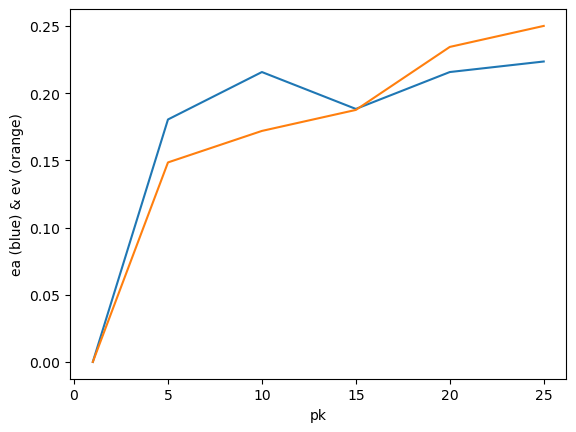

In [17]:
pk = [1,  5, 10, 15, 20, 25]
ea = []
ev = []
for n in pk:
    print(f"X_train_a with {pk}", neighbors(X_train_a,Ya,n))
    ea.append(neighbors(X_train_a,Ya,n)[1])
    print(f"X_train_v with {pk}", neighbors(X_test_v,Yv,n))
    ev.append(neighbors(X_test_v,Yv,n)[1])

fig, ax = plt.subplots()
ax.plot(pk,ea)
ax.plot(pk,ev)
ax.set(xlabel='pk', ylabel='ea (blue) & ev (orange)')

(1.0, 0.0, 1.0, 1.0)
(0.7682291666666666, 0.23177083333333337, 0.6845637583892618, 0.7529201770669713)
(0.7552083333333334, 0.24479166666666663, 0.5906040268456376, 0.725089247465372)
(0.7552083333333334, 0.24479166666666663, 0.6308724832214765, 0.7324575182064829)
(0.7395833333333334, 0.26041666666666663, 0.5570469798657718, 0.706183064400971)
(0.7395833333333334, 0.26041666666666663, 0.6174496644295302, 0.7172354705126375)


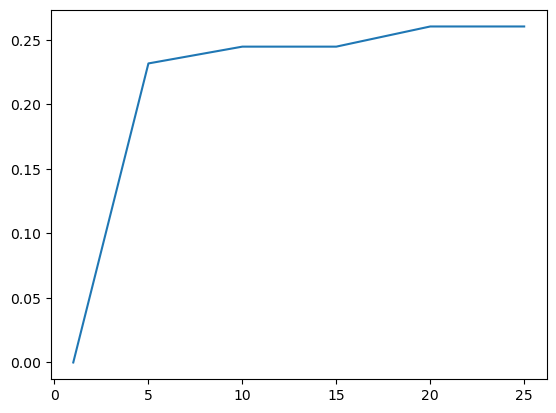

In [18]:
et = []
for n in pk:
    print(neighbors(Xt,Yt,n))
    et.append(neighbors(Xt,Yt,n)[1])
fix, ax = plt.subplots()
ax.plot(pk,et)

In [19]:
## Meilleur modèle pour pk = 20?

In [20]:
#Stratégie 2 : validation-croisée pour la sélection de k. On recherchera le nombre de voisins optimal dans l’ensemble de
#paramètres p_k = {1, 5, 10, 15, 20, 25}.
##Xav validation croisée  -- Xt
##faire Xa (2/3),Xv
##faire Xv (1/3), Xa
## Xa, Xv(1/3), Xa